## Observations and Insights

1. Per the scatter plot, the greater the weight of the mouse on Capomulin, the larger the average tumor size detected.
2. Per the box plot, Ramicane and Capomulin were the best drug regimens for having smaller tumor sizes.
3. Along with having the best outcome for smaller tumor sized, Ramicane and Capomulin both had the most data points used compared to the other drug regimens which could have possibily helped their outcome.



## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Groupby regimen
regimen_group_df = combined_data_df.groupby('Drug Regimen')

# Calculate mean, median, variance, standard deviation, and SEM
mean_volume = regimen_group_df['Tumor Volume (mm3)'].mean()
median_volume = regimen_group_df['Tumor Volume (mm3)'].median()
var_volume = regimen_group_df['Tumor Volume (mm3)'].var()
std_volume = regimen_group_df['Tumor Volume (mm3)'].std()
sem_volume = regimen_group_df['Tumor Volume (mm3)'].sem()

# Display summary in DataFrame
summary_volume_df = pd.DataFrame({"Mean": mean_volume,
                                  "Median": median_volume,
                                  "Variance": var_volume,
                                  "Std Dev": std_volume,
                                  "SEM": sem_volume})
# Format DataFrame
summary_volume_df['Mean'] = summary_volume_df['Mean'].map("{:.2f}".format)
summary_volume_df['Median'] = summary_volume_df['Median'].map("{:.2f}".format)
summary_volume_df['Variance'] = summary_volume_df['Variance'].map("{:.2f}".format)
summary_volume_df['Std Dev'] = summary_volume_df['Std Dev'].map("{:.2f}".format)
summary_volume_df['SEM'] = summary_volume_df['SEM'].map("{:.2f}".format)

summary_volume_df

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

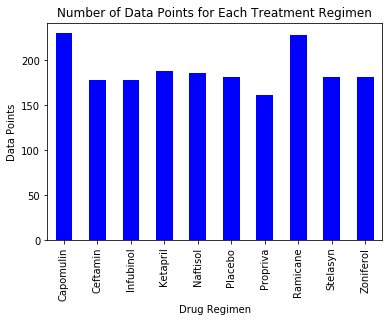

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# Filter DataFrame down to columns to chart
data_points_treatment = combined_data_df.groupby('Drug Regimen')['Mouse ID'].count()

# Create bar plot with pandas
bar_pandas = data_points_treatment.plot(kind='bar', color='blue')

# Assign labels
bar_pandas.set_ylabel('Data Points')
bar_pandas.set_title('Number of Data Points for Each Treatment Regimen')

plt.show(bar_pandas)

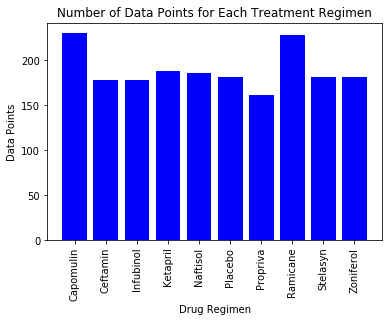

<Figure size 432x288 with 0 Axes>

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Filter DataFrame down to columns to chart
data_points_treatment = pd.DataFrame(combined_data_df.groupby('Drug Regimen')['Mouse ID'].count())

# Create bar plot with pyplot
plt.bar(data_points_treatment.index, data_points_treatment['Mouse ID'], color='b', align='center')

# Assign Labels
plt.ylabel('Data Points')
plt.xlabel('Drug Regimen')
plt.title('Number of Data Points for Each Treatment Regimen')
plt.xticks(rotation='vertical')

plt.show()
plt.tight_layout()

## Pie plots

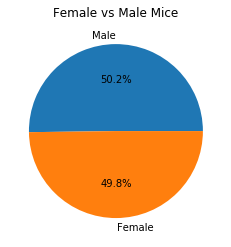

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender = combined_data_df.loc[:,['Sex', 'Mouse ID']].drop_duplicates('Mouse ID')
mouse_gender_count = mouse_gender['Sex'].value_counts()

# Create pie plot
gender_pie_pandas = mouse_gender_count.plot(kind='pie',autopct='%1.1F%%', label = '')

# Create title
gender_pie_pandas.set_title('Female vs Male Mice')
plt.show()

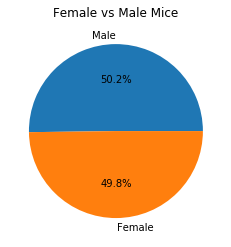

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_gender_count, labels=mouse_gender_count.index,autopct='%1.1F%%' )

plt.title('Female vs Male Mice')
plt.show()

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Ramicane final tumor volume
ramicane = combined_data_df.loc[combined_data_df['Drug Regimen'].isin(['Ramicane'])]
ramicane_tumor_volume = ramicane.groupby(['Mouse ID', 'Drug Regimen'])['Tumor Volume (mm3)'].last()

#Ramicane IQR
ramicane_quartiles = ramicane_tumor_volume.quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[.25]
ramicane_upperq = ramicane_quartiles[.75]
ramicane_iqr = ramicane_upperq - ramicane_lowerq
print(f"The lower quartile of Ramicane is: {round(ramicane_lowerq,2)}")
print(f"The upper quartile of Ramicane is: {round(ramicane_upperq,2)}")
print(f"The interquartile range of Ramicane is: {round(ramicane_iqr,2)}")


# Ramicane potential outliers
ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq - (1.5*ramicane_iqr)
print(f"Values below {round(ramicane_lower_bound,2)} could be outliers for Ramicane.")
print(f"Values above {round(ramicane_upper_bound,2)} could be outliers for Ramicane.\n")

# Capomulin final tumor volume
capomulin = combined_data_df.loc[combined_data_df['Drug Regimen'].isin(['Capomulin'])]
capomulin_tumor_volume = capomulin.groupby(['Mouse ID', 'Drug Regimen'])['Tumor Volume (mm3)'].last()

# Capomulin IQR
capomulin_quartiles = capomulin_tumor_volume.quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[.25]
capomulin_upperq = capomulin_quartiles[.75]
capomulin_iqr = capomulin_upperq - capomulin_lowerq
print(f"The lower quartile of Capomulin is: {round(capomulin_lowerq,2)}")
print(f"The upper quartile of Capomulin is: {round(capomulin_upperq,2)}")
print(f"The interquartile range of Capomulin is: {round(capomulin_iqr,2)}")


# Capomulin potential outliers
capomulin_lower_bound = capomulin_lowerq - (1.5*ramicane_iqr)
capomulin_upper_bound = capomulin_upperq - (1.5*ramicane_iqr)
print(f"Values below {round(capomulin_lower_bound,2)} could be outliers for Capomulin.")
print(f"Values above {round(capomulin_upper_bound,2)} could be outliers for Capomulin.\n")

# Ceftamin final tumor volume
ceftamin = combined_data_df.loc[combined_data_df['Drug Regimen'].isin(['Ceftamin'])]
ceftamin_tumor_volume = ceftamin.groupby(['Mouse ID', 'Drug Regimen'])['Tumor Volume (mm3)'].last()


# Ceftamin IQR
ceftamin_quartiles = ceftamin_tumor_volume.quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[.25]
ceftamin_upperq = ceftamin_quartiles[.75]
ceftamin_iqr = ceftamin_upperq - ceftamin_lowerq
print(f"The lower quartile of Ceftamin is: {round(ceftamin_lowerq,2)}")
print(f"The upper quartile of Ceftamin is: {round(ceftamin_upperq,2)}")
print(f"The interquartile range of Ceftamin is: {round(ceftamin_iqr,2)}")

# Ceftamin potential outliers
ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq - (1.5*ceftamin_iqr)
print(f"Values below {round(capomulin_lower_bound,2)} could be outliers for Ceftamin.")
print(f"Values above {round(capomulin_upper_bound,2)} could be outliers for Ceftamin.\n")

# Infubinol final tumor volume
infubinol = combined_data_df.loc[combined_data_df['Drug Regimen'].isin(['Infubinol'])]
infubinol_tumor_volume = infubinol.groupby(['Mouse ID', 'Drug Regimen'])['Tumor Volume (mm3)'].last()

# Infubinol IQR
infubinol_quartiles = infubinol_tumor_volume.quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[.25]
infubinol_upperq = infubinol_quartiles[.75]
infubinol_iqr = infubinol_upperq - infubinol_lowerq
print(f"The lower quartile of Infubinol is: {round(infubinol_lowerq,2)}")
print(f"The upper quartile of Infubinol is: {round(infubinol_upperq,2)}")
print(f"The interquartile range of Infubinol is: {round(infubinol_iqr,2)}")

# Infubinol potential outliers
infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq - (1.5*infubinol_iqr)
print(f"Values below {round(infubinol_lower_bound,2)} could be outliers for Infubinol.")
print(f"Values above {round(infubinol_upper_bound,2)} could be outliers for Infubinol.\n")

The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
Values below 17.91 could be outliers for Ramicane.
Values above 27.01 could be outliers for Ramicane.

The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
Values below 18.73 could be outliers for Capomulin.
Values above 26.51 could be outliers for Capomulin.

The lower quartile of Ceftamin is: 48.72
The upper quartile of Ceftamin is: 64.3
The interquartile range of Ceftamin is: 15.58
Values below 18.73 could be outliers for Ceftamin.
Values above 26.51 could be outliers for Ceftamin.

The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
Values below 36.83 could be outliers for Infubinol.
Values above 48.31 could be outliers for Infubinol.



<function matplotlib.pyplot.show(*args, **kw)>

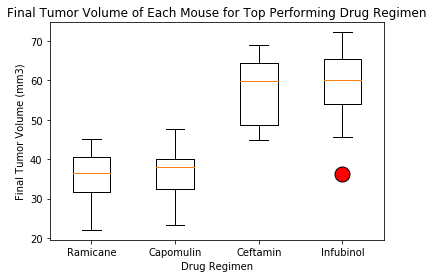

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

flierprops = dict(marker='o', markerfacecolor='red', markersize=15, linestyle='none')

plt.boxplot([ramicane_tumor_volume, capomulin_tumor_volume, ceftamin_tumor_volume, infubinol_tumor_volume], labels = ['Ramicane', 'Capomulin', 'Ceftamin', 'Infubinol'], flierprops=flierprops)
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.title('Final Tumor Volume of Each Mouse for Top Performing Drug Regimen')



plt.show

## Line and scatter plots

<function matplotlib.pyplot.show(*args, **kw)>

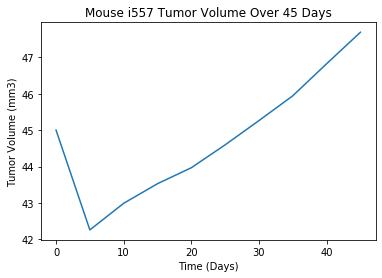

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Generate Capomulin data
capomulin_mouse = combined_data_df.loc[combined_data_df['Drug Regimen'].isin(['Capomulin'])]

# Select a mouse to use for data 'i557'
capomulin_mouse_i557 = capomulin_mouse.loc[capomulin_mouse['Mouse ID'].isin(['i557'])]
capomulin_mouse_i557

# Create line plot
plt.plot(capomulin_mouse_i557['Timepoint'], capomulin_mouse_i557['Tumor Volume (mm3)'])
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse i557 Tumor Volume Over 45 Days')
plt.show

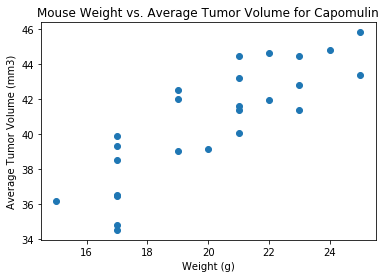

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_mean = capomulin_mouse.groupby('Mouse ID').mean()
capomulin_mean

plt.scatter(capomulin_mean['Weight (g)'], capomulin_mean['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin')
plt.show()

The r-squared is 0.7088568047708717.


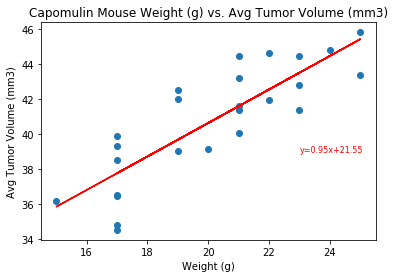

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen


x_values = capomulin_mean["Weight (g)"]
y_values = capomulin_mean["Tumor Volume (mm3)"]

# define values with linear regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# calculate regress values
regress_values = x_values * slope + intercept

# compose the equation of the best fit line
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

# plot the data for the average tumor volume and weight and apply the best fit line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# add the best fit line
plt.annotate(line_eq,(23,39), fontsize=8, color="red")

# add axes labels and title
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.title("Capomulin Mouse Weight (g) vs. Avg Tumor Volume (mm3)")

# calculate the r-squared value and print
r_squared = rvalue**2
print(f"The r-squared is {r_squared}.")